In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("Breast_Cancer.csv")  # Replace with your file name
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

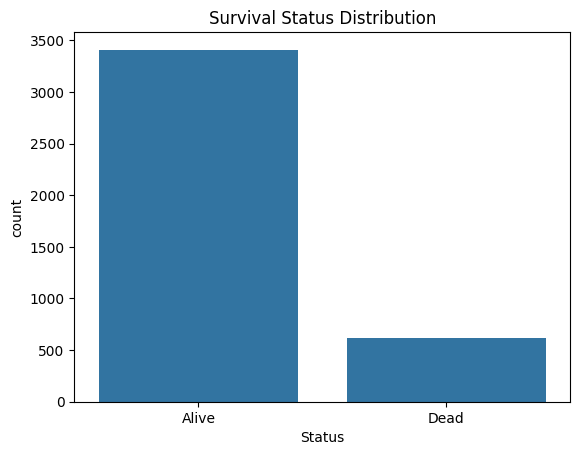

In [4]:
sns.countplot(data=df, x="Status")
plt.title("Survival Status Distribution")
plt.show()

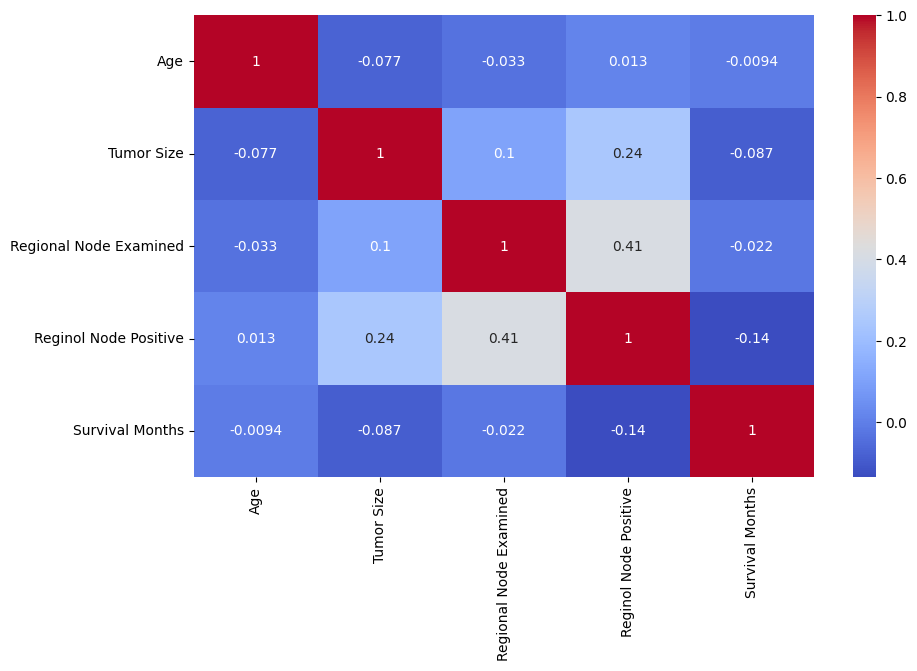

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()

In [6]:
df_clean = df.copy()

# Identify categorical and numeric columns
categorical_cols = df_clean.select_dtypes(include=["object"]).columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Label Encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le

In [7]:
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

In [8]:
# Assuming "Status" is the target label (change if different)
X = df_clean.drop("Status", axis=1)
y = df_clean["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    acc = accuracy_score(y_test, predictions)
    results[name] = acc

    print(f"📌 Model: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("-"*50)

📌 Model: Logistic Regression
Accuracy: 0.9043478260869565
Confusion Matrix:
 [[674  11]
 [ 66  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       685
           1       0.83      0.45      0.58       120

    accuracy                           0.90       805
   macro avg       0.87      0.72      0.76       805
weighted avg       0.90      0.90      0.89       805

--------------------------------------------------
📌 Model: KNN
Accuracy: 0.8857142857142857
Confusion Matrix:
 [[667  18]
 [ 74  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       685
           1       0.72      0.38      0.50       120

    accuracy                           0.89       805
   macro avg       0.81      0.68      0.72       805
weighted avg       0.87      0.89      0.87       805

--------------------------------------------------
📌 Model: SVM

In [10]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n🔥 Best Model: {best_model_name} with Accuracy: {results[best_model_name]}")


🔥 Best Model: Gradient Boosting with Accuracy: 0.915527950310559


In [11]:
import joblib

joblib.dump(best_model, "cancer.pkl")
print("Model saved successfully!")

Model saved successfully!
